<a href="https://colab.research.google.com/github/NahomM12/heart-attack-prediction-using-tensor-flow/blob/HeartTest/heart_analysis/HeartAttackModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dependencies**

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files
import io
data = files.upload()

Saving heart.csv to heart.csv


**Loading data**

We being by loading the .csv file using pd.read_csv().

Additionally, we see some preliminary stats about the data.

In [2]:
heart_df = pd.read_csv(io.StringIO(data['heart.csv'].decode('utf-8')))
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Data preprocessing**

We now convert the Pandas DataFrame into a numpy array, for easier use with TensorFlow.

We also shuffle the array to avoid any inherent bias in the data.

In [3]:
# Convert Pandas DataFrame to numpy array
heart_data = heart_df.to_numpy()

# Shuffle the array to avoid bias
np.random.shuffle(heart_data)

 We allocate 80% of the data to the training set and 20% to the test set.

In [4]:

train_test_split = .8

num_examples = heart_data.shape[0]
num_train_examples = int(np.floor(num_examples*train_test_split))
num_test_examples = int(np.ceil(num_examples*(1 - train_test_split)))
print("Training Examples:", num_train_examples)
print("Test Examples:", num_test_examples)
print("\nTotal Examples:", num_examples)


Training Examples: 242
Test Examples: 61

Total Examples: 303


We then split the dataset between train and test data, and separate the label column from each subset to obtain the necessary format for training.

In [5]:
train_data = heart_data[0:num_train_examples, :]
test_data = heart_data[num_train_examples:len(heart_data), :]

X_train = train_data[:, 0:-1]
y_train = train_data[:, -1]

X_test = test_data[:, 0:-1]
y_test = test_data[:, -1]

We then split the dataset between train and test data, and separate the label column from each subset to obtain the necessary format for training.

In [6]:
print(X_train.shape)
print(y_train.shape)

(242, 13)
(242,)


**Building and compiling our model**

We define our neural network model with a single hidden layer consisting on 16 activation nodes.
A simple design like this works best for a smaller dataset.

In [7]:
inputs = keras.Input(shape=(13), name="features")
x = layers.Dense(16, activation="relu", name="dense_1")(inputs)
outputs = layers.Dense(2, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_1 (Dense)             (None, 16)                224       
                                                                 
 predictions (Dense)         (None, 2)                 34        
                                                                 
Total params: 258 (1.01 KB)
Trainable params: 258 (1.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We will train our model with a batch size of 64 and train for 300 epochs.

In [8]:
BATCH_SIZE = 64
EPOCHS = 300

We will use the Adam optimization algorithm with the standard (recommended) parameter values for  β1
 ,  β2
 , and  ϵ
 .
Our learning rate will be 0.001.

In [10]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

Compile the model using Keras' SparseCategoricalCrossentropy loss function.

In [13]:
model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

**Training the model**

We are ready to train our model.
We pass in X_train as our array of features, and use y_train as our label column.

We enable shuffling to further reduce any bias in the ordering of the training examples.

In [15]:
history = model.fit(
    X_train,
    y_train,
    shuffle=True,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/300
4/4 [==============================] - 1s 6ms/step - loss: 49.3010 - sparse_categorical_accuracy: 0.5331
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 44.4691 - sparse_categorical_accuracy: 0.5331
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 39.6449 - sparse_categorical_accuracy: 0.5331
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 34.8460 - sparse_categorical_accuracy: 0.5331
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 30.0710 - sparse_categorical_accuracy: 0.5331
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 25.1086 - sparse_categorical_accuracy: 0.5331
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 20.5235 - sparse_categorical_accuracy: 0.5331
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 15.6174 - sparse_categorical_accuracy: 0.5331
Epoch 9/300
4/4 [==============================] - 0s 5ms/step -

**Post-training evaluation**

We will now examine the performance of the model on the test set.
Let's create an array of predictions for the data in X_test.

In [16]:
predictions = model.predict(X_test)


2/2 [==============================] - 0s 5ms/step


Quickly define a function for comparing our model's predictions to the actual values in y_test.

In [17]:
def get_prediction_array(predictions, y):
     pred_arr = (predictions[:, 0] < 0.5)
     pred_arr = np.column_stack((pred_arr, y))
     return pred_arr


We tally up the number of correct predictions and obtain a percentage for accuracy of the model.

We obtain an accuracy in the 80-90% range.

In [18]:
results = get_prediction_array(predictions, y_test)
num_correct = 0
for i in range(num_test_examples):
    if results[i, 0] == results[i, 1]:
        num_correct += 1


We can see that TensorFlow's evaluate() function gives us the same value.

In [20]:
score = model.evaluate(X_test, y_test)
print("\nAccuracy:", score[1])

2/2 [==============================] - 0s 10ms/step - loss: 0.2859 - sparse_categorical_accuracy: 0.8852

Accuracy: 0.8852459192276001


Create an array for prediction success (1 = Correct, 0 = Incorrect).

In [21]:
performance = (results[:, 0] == results[:, 1]).astype(int)

We can see from the bar chart that our model performed fairly well.

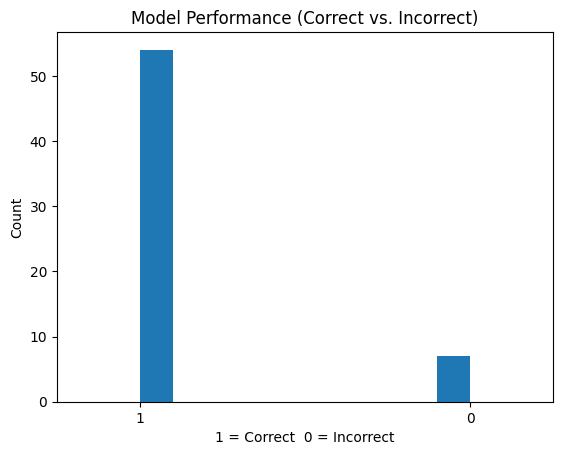

In [23]:
plt.title("Model Performance (Correct vs. Incorrect)")
plt.xlabel("1 = Correct  0 = Incorrect")
plt.ylabel("Count")
plt.xticks([1, 0])
plt.xlim(1.25, -0.25)

plt.hist(performance)
plt.show()